## Analisis de Componentes Principales - Paso a Paso
* Estandarizar los datos (para cada una de las m observadas)
* Obtener los vectores y valores porpios a partir de la matriz de covarianzas o de correlaciones o incluso la tecnica de singular vector decomposition
* Ordenar los valores propios en orden descendente y quedarnos con lo *p* que se correspondan a los *p* mayores y asi disminuir el numero de variables del dataset (p<m)
* Construir la matriz de proyeccion W a oartur de los p vectores propios
* Tranformar el dataset  original X a travez de W para asi obtener datos en el subespacio dimensión *p*, que será Y

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("../datasets/iris/iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

In [9]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [29]:
import chart_studio.plotly as py
from plotly.graph_objs import *
import chart_studio.tools as tls
from  plotly.graph_objs.histogram.selected  import Marker as Markerr

In [36]:
tls.set_credentials_file(username="JuanGabriel",api_key="6mEfSXf8XNyIzpxwb8z7")

In [38]:
traces = []
legend = {0:False, 1:False, 2:False, 3:False}

#colors = {'setosa':'#ff7f14','versicolor':'#1fdc78','verginica':'#2c32b4'}
colors = {'setosa':'rgb(255,127,20)','versicolor':'rgb(31,220,120)','verginica':'rgb(44,50,180)'}

for col in range(4):
    for key in colors:
        #traces.append(Histogram(x=X[Y==key, col], opacity = 0.7, xaxis="x%s"%(col+1), marker= Markerr(color=colors[key]), name = key, showlegend=legend[col]))
        traces.append(Histogram(x=X[Y==key, col], opacity = 0.7, xaxis="x%s"%(col+1), name = key, showlegend=legend[col]))

data = Data(traces)
layout = Layout(barmode="overlay",
               xaxis = XAxis(domain=[0,0.25], title="Long. Sépalos (cm)"),
               xaxis2 = XAxis(domain=[0.3,0.5], title="Anch. Sépalos (cm)"),
               xaxis3 = XAxis(domain=[0.55,0.75], title="Long. Pétalos (cm)"),
               xaxis4 = XAxis(domain=[0.8,1.0], title="Anch. Pétalos (cm)"),
               yaxis=YAxis(title="Número de ejemplares"),
               title="Distribucion de los ragos de las diferentes flores Iris")

fig = Figure(data=data, layout = layout)
#py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




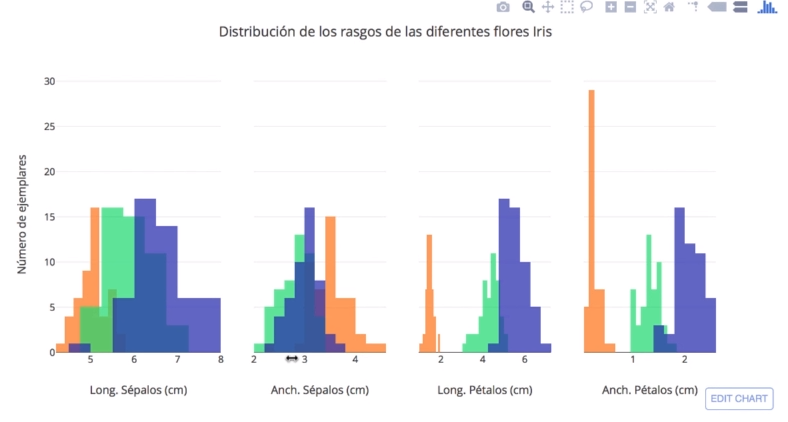

In [41]:
from IPython.display import Image
Image(filename="resources/plotly.png")

In [46]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]]
[[-0.90068117]]
[[1.01900435]]
[[-1.34022653]]
[[-1.3154443]]


(array([41.,  8.,  1.,  7., 21., 20.,  6., 23.,  9., 14.]),
 array([-1.44707648, -1.13115924, -0.81524199, -0.49932475, -0.18340751,
         0.13250973,  0.44842697,  0.76434422,  1.08026146,  1.3961787 ,
         1.71209594]),
 <a list of 10 Patch objects>)

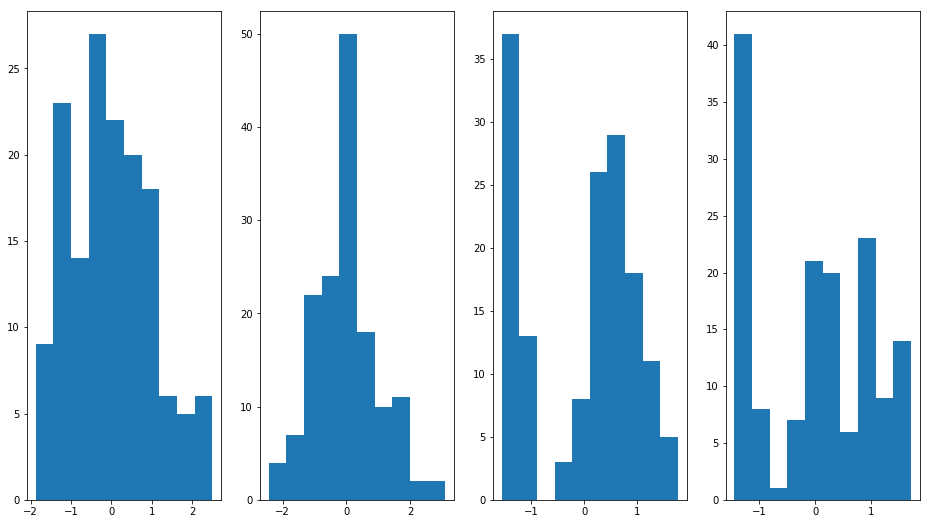

In [72]:
X_std = StandardScaler().fit_transform(X)

figure, axs = plt.subplots(1,4, figsize=(16,9))
axs[0].hist(X_std[:,0:1])
axs[1].hist(X_std[:,1:2])
axs[2].hist(X_std[:,2:3])
axs[3].hist(X_std[:,3:4])


### Ahora los histogramas estan normalizados con el centro a 0

### 1.- Calculamos la descomposicion de valores y vectores propios
#### A) Usando Matriz de covarianza

Un vetor propio y un valor propio represetan el core fundamental de la ACP
Apartir de la matriz de covarianza o matriz de correlaciones se extraen lo vectores propios las componente prinicipales que determinan las direcciones en el nuevo espacio vectorial y los valores propios que determinan la magnitud
Los valore propios explican la varianza de los datos atraves de los nuevos ejes

In [73]:
from IPython.display import display, Math, Latex

In [79]:
display(Math(r'\sigma_{jk} = \frac{1}{n-1}\sum_{i=1} ^ m(x_{ij} - \overline{x_j}) (x_{ik} - \overline{x_k})'))

<IPython.core.display.Math object>

In [86]:
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

<IPython.core.display.Math object>

In [84]:
display(Math(r'\overline{x}  = \sum_{i=1}^n x_i\in \mathbb R^m'))

<IPython.core.display.Math object>

In [82]:
import numpy as np

In [83]:
mean_vect  = np.mean(X_std, axis=0)
mean_vect# El promedio de las 4 variables por que todas estan normalizadas

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [87]:
#Matriz de covarianza 
# dot hace el producto de las matrices
#usamos la segunda formula
cov_matrix = (X_std - mean_vect).T.dot((X_std - mean_vect))/(X_std.shape[0]-1)#1 menos que las dimenciones(shape) tien las longitudes

In [88]:
print("La matriz de covarianza es \n%s"%cov_matrix)
#La diagonal no deberia ser 1 como en la matriz de correlacion puede diferir

La matriz de covarianza es 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [143]:
# Se puede hace la matriz de covarianzas con la funcion de numpy y da lo mismo
# lo de arriba es para validar que la formula al final es igual que la funcion
np.cov(X_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [91]:
#obtenemos valores propios y vectores propios
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)# esta funcion es para remplezar hacer nosotros la formula de las lambdas = 0

In [93]:
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### b) Usando la Matriz de Correlaciones

Este metodo se suele usar en las finanzas

La matriz tiene que estar normalizada(estandarizar) para poder usarse  y esta si genera la diagonal de 1

#### La descomposicion de valores de una matriz de covarianza despues de la estandarizacion es la misma que la descomposicion de la matriz de correlacion con o sin estandarizar

In [94]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [96]:
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [98]:
corr_matrix = np.corrcoef(X.T)
corr_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### c) Singular Value Decomposition

### Lo algoritmos de Python y R usan Singular Value Decomposition por que mejora la eficacia computacional

La matriz tiene que estar entandarizada
* U: ES la mima matriz que vectores propios
* S: Podria ser el equivalente a valores propios pero es mucho mas grande
* V: No se explico

In [100]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [101]:
s

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [103]:
v

array([[ 1.08239531e-01,  9.94577561e-02,  1.12996303e-01, ...,
        -7.27030413e-02, -6.56112167e-02, -4.59137323e-02],
       [-4.09957970e-02,  5.75731483e-02,  2.92000319e-02, ...,
        -2.29793601e-02, -8.63643414e-02,  2.07800179e-03],
       [ 2.72186462e-02,  5.00034005e-02, -9.42089147e-03, ...,
        -3.84023516e-02, -1.98939364e-01, -1.12588405e-01],
       ...,
       [ 5.43380310e-02,  5.12936114e-03,  2.75184277e-02, ...,
         9.89532683e-01, -1.41206665e-02, -8.30595907e-04],
       [ 1.96438400e-03,  8.48544595e-02,  1.78604309e-01, ...,
        -1.25488246e-02,  9.52049996e-01, -2.19201906e-02],
       [ 2.46978090e-03,  5.83496936e-03,  1.49419118e-01, ...,
        -7.17729676e-04, -2.32048811e-02,  9.77300244e-01]])

## ACP
Reducir la dimencionalidad del espacio vectorial original proyectando los datos en subespacion de dimencion mas pequeña desde las direcciones que definene lo vectores propios desde lo ejes
Sim embargo los Vectores propios no solo definen la direccion ademas deben tener todos dimension 1 para que se trate de una base de un espacio vectorial


### 2 - Las componentes principales

Revisar longitud

In [105]:
for ev in eig_vectors:
    print("La longitud del Vp es: %s"%np.linalg.norm(ev))
    
#Si tienen longitud 1

La longitud del Vp es: 0.9999999999999997
La longitud del Vp es: 1.0000000000000002
La longitud del Vp es: 1.0
La longitud del Vp es: 0.9999999999999997


### Para decidir que vectores propios se pueden eliminar sin perder demasiada informacion para construir un espacio vectorial de dimencion inferior
Busca 
Cada uno de los valores propios
Los vectores propios que tenga el valor propio con menos informacion de la distribucion de los datos seran lo que se van a eliminar


In [108]:
#parejas de valores y vectores propios,
#abs por si alguno es negativo queremos el valor absoluto
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(2.938085050199993,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624873,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449481,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462803,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [109]:
eigen_pairs.sort()#ordenara mas pequeña o mas grande por la primera columna
eigen_pairs.reverse()# revierte ahora de mas alto a mas pequeño
eigen_pairs

[(2.938085050199993,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624873,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449481,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462803,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [110]:
print("Valores propios en orden descendente:")
for ep in eigen_pairs:
    print (ep[0])

Valores propios en orden descendente:
2.938085050199993
0.9201649041624873
0.1477418210449481
0.020853862176462803


In [148]:
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Esto define el valor que cada columna aporta a la prediccion\n",var_exp)
print("Esto define el aculmativa de todas las columnas \n",cum_var_exp)

Esto define el valor que cada columna aporta a la prediccion
 [72.96244541329986, 22.850761786701774, 3.6689218892828794, 0.5178709107154932]
Esto define el aculmativa de todas las columnas 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [123]:
plot1 = Bar(x=["CP %s"%i for i in range(1,5)], y= var_exp, showlegend=False)
plot2 = Scatter(x=["Cp %s"%i for i in range(1,5)], y = cum_var_exp, showlegend=True, name= "% de Varianza Explicada Acumulativa")

data = Data([plot1, plot2])
layout = Layout(xaxis = XAxis(title="componentes principales"),
               yaxis = YAxis(title="POrcentaje de varianza explicada"),
               title="POrcentaje de variabilidad explicada por cada compoenten principal")

fig = Figure(data,layout)
#py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis




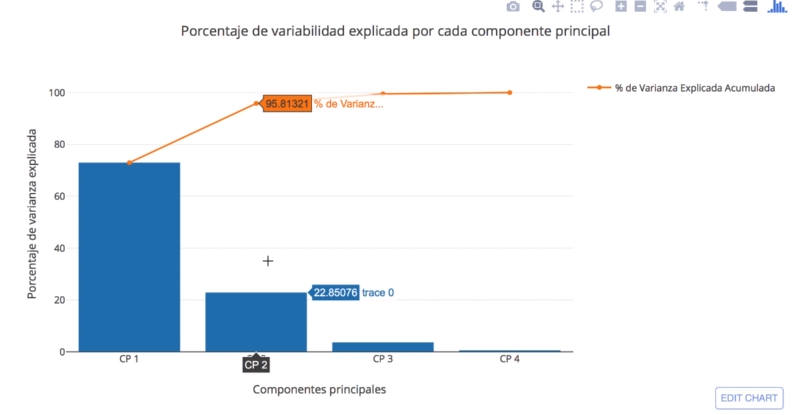

In [124]:
from IPython.display import Image
Image(filename="resources/Componentes_principales.png")


### En poco palabras la primera columna explica el 72% del modelo 
### La segunda columna explica el 22%
### La tercera y cuarta explican 3% y 0.5% por lo tanto las podemos eliminar
### Con la eliminacion de las dos columas ultimas reducimos a la mitad los datos duplicamos la velocidad de ejecucion y solo podriamos explicar el 95.8%

In [153]:
##hstack coloca 1 debajo del otro stack
## Tomamos la columa 0 y 1 de los pares y las cambiamos a columna
W = np.hstack((eigen_pairs[0][1].reshape(4,1),
               eigen_pairs[1][1].reshape(4,1)))
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [154]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
# Lo siguiente sera multiplicar X orignal por W y reducir de 4 columnas a 2

### 3- Proyectando las variables en el nuevo subespacio vectoria

In [131]:
display(Math(r' Y = X \cdot W, X \in M(\mathbb R)_ {150,4}, W \in M(\mathbb R)_{4,2}, Y \in M(\mathbb R)_{150,2}'))
#Ley 
#150 x 4  * 4 x 2 = 150 x 2
#los dos 4 tienen que ser igual

<IPython.core.display.Math object>

In [155]:
y = X_std.dot(W)    
print(y[:5])
print(y.shape)

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]
(150, 2)


In [137]:
results = []

for name  in ('setosa','versicolor','verginica'):
    result = Scatter(x = y[y==name,0], y = Y[y==name,1],
                    mode = "markers", name=name,
                    marker=Marker(size=12,line=Line(color='rgba(220,220,220,0.15)',width=0.5), opacity=0.8))
    results.append(result)
data = Data(results)
layout = Layout(showlegend=True, scene = Scene(xaxis=XAxis(title="Componenten Principal 1"),
                                              yaxis=YAxis(title="Componenten Principal 2")))

fig = Figure(data=data,layout=layout)
#py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the followin

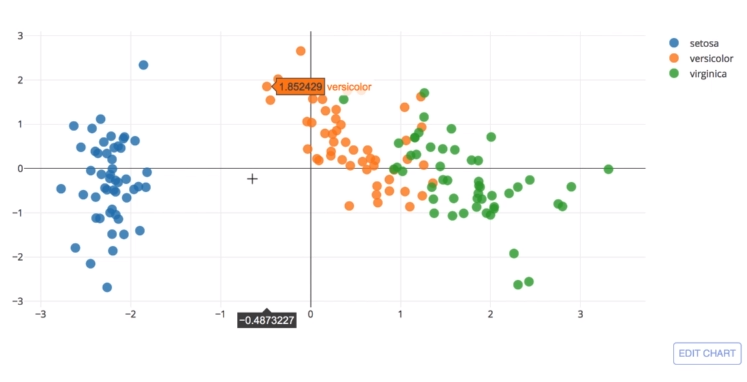

In [139]:
from IPython.display import Image
Image(filename="resources/Componentes_principales_2.png")

## Este metodo tecnicamente seria parte de la limpieza de datos, 
### Depues de esto pues se puede hacer todo Clasificaion, Regresion, SVM, Red neuronal, Kneireneiborh pero con la mitad de datos